<a href="https://colab.research.google.com/github/kimjeongsoo20190147/fisa04/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np

# y = wx + b
# 우리의 목표
# x=1이 들어오면 y=0을 리턴하는 퍼셉트론을 만들기

w = np.random.uniform(0,1) # wx + b에서 초기 w는 랜텀한 값이 부여됨
b = np.random.uniform(0,1) # 초기에는 wx로 설명할 수 없는 것들을 몰아 넣는 bias를 임의로 설정함

print(w)

x=0
y=1
eta = 0.01 # 학습률(learning rate) : 기존 결과의 0.01만큼을 다음번 학습에 반영

for i in range(1000):
  output = w * x + b # yhat = wx + b
  error = y - output # 예측한 값(output)과 실제값(y) 사이의 오차
  w = w + (x*error)*eta # 오차의 반대방향으로 (오차*학습률)만큼 이동하게 됨
  b = b + error * eta

  if i % 100 == 99: # 100번 학습시 마다
    print(f'학습횟수 : {i}번째, 들어온 값: {x}, 예측결과(output): {output}, 가중치: {w}, 편향: {b}, 오차{error}')

0.5590657033329643
학습횟수 : 99번째, 들어온 값: 0, 예측결과(output): 0.9846365741359062, 가중치: 0.5590657033329643, 편향: 0.9847902083945471, 오차0.015363425864093783
학습횟수 : 199번째, 들어온 값: 0, 예측결과(output): 0.9943764892609881, 가중치: 0.5590657033329643, 편향: 0.9944327243683783, 오차0.0056235107390119055
학습횟수 : 299번째, 들어온 값: 0, 예측결과(output): 0.9979416131980243, 가중치: 0.5590657033329643, 편향: 0.997962197066044, 오차0.0020583868019756757
학습횟수 : 399번째, 들어온 값: 0, 예측결과(output): 0.9992465638596271, 가중치: 0.5590657033329643, 편향: 0.9992540982210308, 오차0.0007534361403729317
학습횟수 : 499번째, 들어온 값: 0, 예측결과(output): 0.9997242180055396, 가중치: 0.5590657033329643, 편향: 0.9997269758254842, 오차0.0002757819944604334
학습횟수 : 599번째, 들어온 값: 0, 예측결과(output): 0.9998990548708864, 가중치: 0.5590657033329643, 편향: 0.9999000643221775, 오차0.00010094512911362763
학습횟수 : 699번째, 들어온 값: 0, 예측결과(output): 0.9999630508180505, 가중치: 0.5590657033329643, 편향: 0.99996342030987, 오차3.694918194951935e-05
학습횟수 : 799번째, 들어온 값: 0, 예측결과(output): 0.9999864754044224, 가중치: 0.559

뉴런 학습이란? 에러가 0에 가까워지게 기댓값에 가까운 값을 얻는 것...

- W값을 얻기 위에 변화하는 알고리즘?
  - 경사 하강법(Gradient Descent)
     - w에 입력과 학습률과 에러를 곱한 값을 더해주는 것


편향이란?
 - 입력으로는 늘 한쪽으로 치우친 고정된 값(예, 1)을 받아서 입력으로 0을 받았을 때 뉴런이 아무것도 배우지 못하는 상황을 방지

딥러닝과 머신러닝의 차이점: 딥러닝은 정형화되지 않은 데이터라 어마어마하게 많은 데이터 필요.

기초 통계

In [1]:
import warnings # 실행자체에는 문제가 없는 몇몇 메시지들을 없애는 옵션
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from statistics import mode

import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True) # 지수표기법으로 숫자가 출력되는 것 방지

In [2]:
# 도미 데이터 준비하기
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
df = pd.DataFrame(zip(bream_length, bream_weight),   columns= ['length', 'weight'])

In [3]:
df

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0
5,29.7,450.0
6,29.7,500.0
7,30.0,390.0
8,30.0,450.0
9,30.7,500.0


In [4]:
df.describe()

,length,weight
count,35.000000,35.000000
mean,33.108571,617.828571
std,3.911925,209.205709
min,25.400000,242.000000
25%,30.350000,462.500000
50%,33.000000,610.000000
75%,35.000000,717.000000
max,41.000000,1000.000000


In [5]:
# 도미 길이의 평균을 확인보세요(mean)
# 33.108571	617.828571
# 중앙값(median)
# 50%	33.000000	610.000000
# 최빈값(mode) - 중복되는 경우 가장 먼저 count된 수만 나옵니다
df.mode()

,length,weight
0,35.0,500.0


In [7]:
print(df[df.length == 35.0])
print(df[df.weight == 500.0])

    length  weight
23    35.0   680.0
24    35.0   700.0
25    35.0   725.0
26    35.0   720.0
    length  weight
6     29.7   500.0
9     30.7   500.0
11    31.0   500.0
12    31.5   500.0


In [6]:
df.length.duplicated() # 35cm / 34.5cm -> 4마리씩 있어도  행번호가 앞선 값만 출력해줍니다.

,length
0,False
1,False
2,False
3,False
4,True
5,False
6,True
7,False
8,True
9,False


In [8]:
df.length.value_counts()

,count
length,
35.0,4
32.0,3
33.0,2
38.5,2
36.0,2
34.0,2
33.5,2
41.0,2
31.0,2


In [9]:
df.weight.value_counts()

,count
weight,
500.0,4
700.0,3
340.0,2
450.0,2
600.0,2
242.0,1
680.0,1
975.0,1
925.0,1


In [10]:
df.value_counts()

length  weight
33.0    700.0     2
32.0    600.0     2
25.4    242.0     1
35.0    725.0     1
34.5    620.0     1
35.0    680.0     1
        700.0     1
        720.0     1
36.0    714.0     1
34.0    575.0     1
36.0    850.0     1
37.0    1000.0    1
38.5    920.0     1
        955.0     1
39.5    925.0     1
41.0    950.0     1
34.0    685.0     1
33.5    610.0     1
        650.0     1
26.3    290.0     1
32.0    340.0     1
31.5    500.0     1
31.0    500.0     1
        475.0     1
30.7    500.0     1
30.0    450.0     1
        390.0     1
29.7    500.0     1
        450.0     1
29.0    430.0     1
        363.0     1
26.5    340.0     1
41.0    975.0     1
Name: count, dtype: int64

In [11]:
# 길이의 절사평균
q1 = np.percentile(df.length, 25)
q3 = np.percentile(df.length, 75)

iqr = q3 - q1

In [12]:
# 절사평균 : max, min을 구해보시고 현재 도미의 길이 데이터에는 outlier(이상치)가 있는지 직접 확인해보세요
min_ = q1 - 1.5*iqr
max_ = q3 + 1.5*iqr # robust scaler

In [15]:
# yhat = ax1 + bx2 + c
df.length[(min_ >= df.length) | (max_ <= df.length)]

,length


# 편차 구하기

In [20]:
# 각각의 값이 도미 길이의 평균으로부터 얼마나 값이 떨어졌는지 - 편차(deviation)

mean = df.length.mean()

In [21]:
deviation = df.length - mean

In [22]:
deviation.sum() # 결국 편차의 합은 0이 되어버려서

-6.394884621840902e-14

# 변동 구하기

In [ ]:
# 각각의 값이 도미 길이의 평균으로부터 얼마나 값이 떨어졌는지를 제곱한 것 - 변동(variation)
# (음으로 멀어졌든, 양으로 멀어졌든 멀어진 건 멀어진거니까) : 오차 계산

In [ ]:
# 도미 길이에 대한 분산 구하기 (varinace)

In [31]:
variation = deviation ** 2

In [32]:
varinace = sum(variation) / len(variation)

In [33]:
variation

,length
0,59.422073
1,46.356645
2,43.673216
3,16.880359
4,16.880359
5,11.618359
6,11.618359
7,9.663216
8,9.663216
9,5.801216


# 표준편차 구하기

In [34]:
std = np.sqrt(variation)
std

,length
0,7.708571
1,6.808571
2,6.608571
3,4.108571
4,4.108571
5,3.408571
6,3.408571
7,3.108571
8,3.108571
9,2.408571


In [ ]:
std = np.sqrt(variation)

In [35]:
# 통계학에는 자유도(degree of freedom)라는 개념이 있음

# 우리가 구하고 싶은 모집단의 대표값 - 우리는 거의 대부분의 상황에 표본집단으로 모집단을 추론해야함
# 모든 모집단을 가지고 통계량을 냈을 때 변화할 수 있는 정도에 대한 여지를 -1로 보정해서 표현함
# 우리가 가진 35마리는 세상 모든 도미에 대한 데이터가 아님.

np.sqrt(sum(variation) / (len(variation) - 1))

3.9119253141983097

In [37]:
df.head() # 길이는 cm, 무게는 g 단위를 가지고 있는데
# 특정 필드(무게)가 값이 100단위라서 주는 큰 영향력을 막기 위해서
# 평균 0, 표준편차 1로 각 변수의 분포를 규격화(표준화)하는 과정을 거칩니다.

# ax + bx2 + c = yhat

# 여러 개의 칼럼이 서로 다른 단위값(scale)로 되어 있을 때
# 칼럼별 산포, 중심에 대한 통계치들을 확인하기 어렵다. 규격화 해주는 과정

# 데이터에서 평균을 빼고, 표준편차로 나누는 과정
z1 = (df.length - mean) / np.std(df.length)
z1

,length
0,-1.999300
1,-1.765875
2,-1.714003
3,-1.065602
4,-1.065602
5,-0.884049
6,-0.884049
7,-0.806241
8,-0.806241
9,-0.624689


In [40]:
z2 = (df.weight - df.weight.mean()) / np.std(df.weight)

In [41]:
df_z = pd.DataFrame(zip(z1,z2), columns=['length_z', 'weight_z'])
df_z

,length_z,weight_z
0,-1.999300,-1.822682
1,-1.765875,-1.589893
2,-1.714003,-1.347404
3,-1.065602,-1.235860
4,-1.065602,-0.910925
5,-0.884049,-0.813930
6,-0.884049,-0.571441
7,-0.806241,-1.104916
8,-0.806241,-0.813930
9,-0.624689,-0.571441


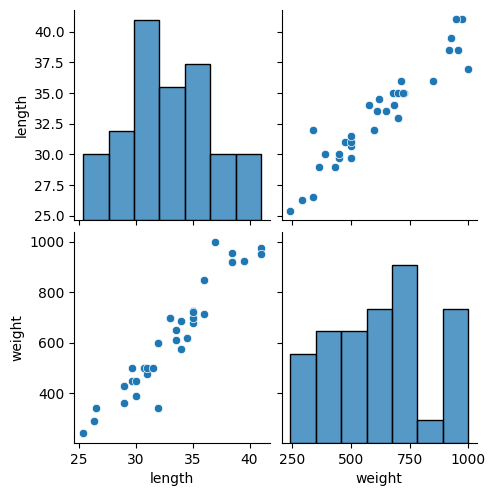

In [42]:
sns.pairplot(df)

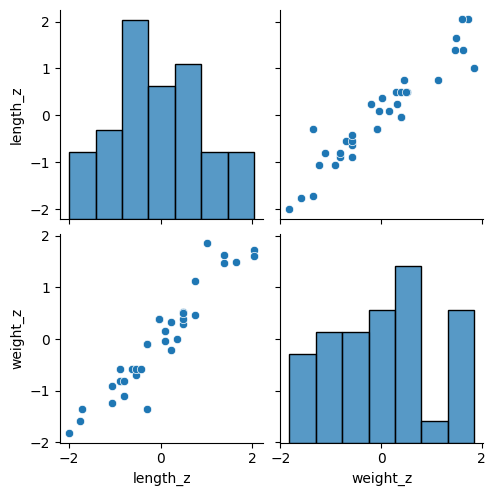

In [43]:
sns.pairplot(df_z)

In [46]:
# 같은 규격(-1 ~ 1) 사이에 각 필드를 구겨 넣는 것
df_normal = (df-df.min()) / (df.max()-df.min())

In [47]:
df_normal.describe().astype(int)

,length,weight
count,35,35
mean,0,0
std,0,0
min,0,0
25%,0,0
50%,0,0
75%,0,0
max,1,1


In [ ]:
# 집값에 영향을 미치는 요소들 -> 집값 예측
#        w2가 w3에 영향을 미친다 -> 상관관계가 있다 0.2만 넘어도
# w1x1 + w2x2 + w3x3 + ...................................... + b = yhat
# 평수, 동네, 한강이 보이는지, 아파트/빌라, 근처 학교가 있는지, .......    -> 집값
#       동부이촌동    한강보임
#       성수동        한강보임
#       화곡동        한강안보임
#       상일동        한강안보임

# 날씨 예측모델
# 강수량, 비오는지 여부, 눈 오는지 여부, 습도, 온도 .......... -> 오늘 날씨 (흐림, 비옴, 맑음, 눈옴 )
# w1        w2          w3             w4    w5
# 많으면      o              o           높     x

In [48]:
np.cov(df.length, df.weight)

array([[   15.30315966,   774.41327731],
       [  774.41327731, 43767.02857143]])

In [49]:
np.cov(df.weight, df.length)

array([[43767.02857143,   774.41327731],
       [  774.41327731,    15.30315966]])

In [50]:
summary_df = df.copy()
summary_df['length_deviation'] = summary_df['length'] - summary_df['length'].mean() # 길이 편차
summary_df['weight_deviation'] = summary_df['weight'] - summary_df['weight'].mean() # 무게 편차
summary_df['product of deviations'] = summary_df['length_deviation'] * summary_df['weight_deviation']
summary_df

,length,weight,length_deviation,weight_deviation,product of deviations
0,25.4,242.0,-7.708571,-375.828571,2897.101388
1,26.3,290.0,-6.808571,-327.828571,2232.044245
2,26.5,340.0,-6.608571,-277.828571,1836.049959
3,29.0,363.0,-4.108571,-254.828571,1046.981388
4,29.0,430.0,-4.108571,-187.828571,771.707102
5,29.7,450.0,-3.408571,-167.828571,572.055673
6,29.7,500.0,-3.408571,-117.828571,401.627102
7,30.0,390.0,-3.108571,-227.828571,708.221388
8,30.0,450.0,-3.108571,-167.828571,521.707102
9,30.7,500.0,-2.408571,-117.828571,283.798531


In [54]:
summary_df.sum().astype(int)

# covariance를 각 필드에 대해서 표준화(평균 0, 표준편차 1)로 변환해서 -> 상관계수
np.corrcoef(df.length, df.weight) # 길이, 무게는 약 94.62 정도의 상관관계가 있구나 -> 아주 강한 상관관계

array([[1.        , 0.94625613],
       [0.94625613, 1.        ]])

In [55]:
import numpy as np
from scipy.stats import skew, kurtosis

# 예시 데이터 (income or test scores)
data = np.array([20, 30, 40, 50, 60, 70, 80, 80, 80, 90])
df_data = pd.DataFrame(data)
df_data.describe()  # 60점 평균 # 표준편차 24.03

,0
count,10.000000
mean,60.000000
std,24.037009
min,20.000000
25%,42.500000
50%,65.000000
75%,80.000000
max,90.000000


In [57]:
# skewness(왜도)
data_skewness = skew(data)
data_skewness

-0.4047960089109366

In [58]:
# 데이터가 모자른 경우 이미 있는 데이터를 바탕으로 증강하는 방법이 있음
# 대표성을 가진 더미데이터를 만들어내기 위해서 평균을 사용할 수 있음
df.sample(20).mean() # 35마리에는 없긴 하지만, 35마리의 경향성을 가지고 있는 더미데이터가 됨

# 적은 데이터로 너무 많은 증강을 해버린다면... 어느 순간부터는 의미가 없어짐

,0
length,31.82
weight,537.90


In [59]:
from scipy.stats import bernoulli, binom, poisson

In [ ]:
dice = [1, 2, 3, 4, 5, 6]
prob = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# 1이나오면 성공

# 파이썬으로 퍼셉트론 학습 알고리즘 구현

## 객체 지향 퍼셉트론 API

In [1]:
import numpy as np

# yhat = w1x1 + w2x2 + ..... wnxn + bias  - w들과 b는 모델이 스스로 변경하는 파라미터
# 파라미터를 변경하는 방법을 조율하기 위해 개발자가 넣어주는 파라미터 - 하이퍼파라미터 (eta, epoch, batch_size)
# 재사용 가능한 클래스로 뉴런에 필요한 속성, 기능들을 몰아넣을 겁니다.

class Perceptron(object):
    # 최초로 생성될 때 하이퍼파라미터를 가지고 퍼셉트론이 생성되도록
    def __init__(self, eta, n_iter=50, batch_size=1, random_state=1):
            self.eta = eta
            self.n_iter = n_iter
            self.batch_size = batch_size
            self.random_state = random_state

    # 학습시키기 위한 함수
    # X - 독립변수(문제들) - 상수처럼 값을 집어넣기만 할 뿐이다
    # y - 종속변수(예측되어야 하는 정답) - X의 영향을 받는다 y
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)

        #  b + w1x2 + w2x2 + ....  필드 개수를 유연하게 받고
        # (4.2, 1.2, 1.4, 3.5) - 1
        # (0)   - 1
        # (23) - 400
        self.w_ = rgen.normal(loc=0, scale=0.01, size=X.shape[1] +1 )# 들어오는 X의 컬럼수(특성수)만큼 가중치 w_ + bias의 초기 가중치인 1을 더합니다.
        self.errors_ = [] # 1개의 bias를 변경하기 위해 학습할 때마다 오차를 list로 전달해서 확인
        print(self.errors_)

        # 실제 학습
        for _ in range(self.n_iter):
            errors = 0

            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi # w1x1 ~ wnxn 까지의 가중치에 오차를 학습률만큼 곱해서 반영
                self.w_[0] += update # b 에 오차를 학습률만큼 곱해서 반영
                errors += int(update != 0.0) #  update가 0이 아니면 분류 오류가 있었음을 의미하므로 errors에 누적 계산
############################# 들여쓰기 ################################################
            self.errors_.append(errors) # 반복이 끝나면 1epoch의 errors를 저장

        return self

    # 추론의 결과 다음 뉴런에게 합산해서 출력하는 함수
    def predict(self, X): # 0.0000001 이상이면 클래스 1, 0보다 작으면 -1을 리턴하도록 하는 이진분류기
        return np.where(self.net_input(X) > 0, 1, -1)

    # 새 데이터를 추론하기 위한 함수
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # yhat


# 붓꽃 데이터셋에서 퍼셉트론 훈련

## 붓꽃 데이터셋 읽기

In [2]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
# 4번 칼럼을 명목형 변수로 바꿔줘야 합니다. 1/-1
# 0~49 : setosa / 50~99 : versicolor / 100~149 : virginica
#       1                -1

## 붓꽃 데이터 그래프 그리기

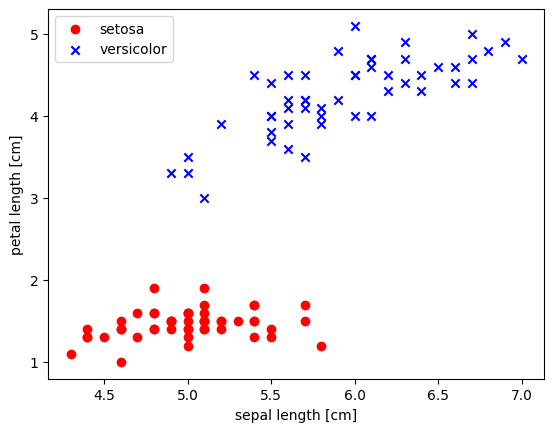

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 선택합니다
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1) # 정답지(target, class라고 부름)

# 꽃받침 길이와 꽃잎 길이를 추출합니다
X = df.iloc[0:100, [0, 2]].values # (꽃받침길이, 꽃잎길이) 문제지(feature, tuple)

# 산점도를 그립니다, setosa-음성, versicolor-양성
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [5]:
X, y

(array([[5.1, 1.4],
        [4.9, 1.4],
        [4.7, 1.3],
        [4.6, 1.5],
        [5. , 1.4],
        [5.4, 1.7],
        [4.6, 1.4],
        [5. , 1.5],
        [4.4, 1.4],
        [4.9, 1.5],
        [5.4, 1.5],
        [4.8, 1.6],
        [4.8, 1.4],
        [4.3, 1.1],
        [5.8, 1.2],
        [5.7, 1.5],
        [5.4, 1.3],
        [5.1, 1.4],
        [5.7, 1.7],
        [5.1, 1.5],
        [5.4, 1.7],
        [5.1, 1.5],
        [4.6, 1. ],
        [5.1, 1.7],
        [4.8, 1.9],
        [5. , 1.6],
        [5. , 1.6],
        [5.2, 1.5],
        [5.2, 1.4],
        [4.7, 1.6],
        [4.8, 1.6],
        [5.4, 1.5],
        [5.2, 1.5],
        [5.5, 1.4],
        [4.9, 1.5],
        [5. , 1.2],
        [5.5, 1.3],
        [4.9, 1.5],
        [4.4, 1.3],
        [5.1, 1.5],
        [5. , 1.3],
        [4.5, 1.3],
        [4.4, 1.3],
        [5. , 1.6],
        [5.1, 1.9],
        [4.8, 1.4],
        [5.1, 1.6],
        [4.6, 1.4],
        [5.3, 1.5],
        [5. , 1.4],


In [6]:
X # ([5.1, 1.4], -1)
y

ppn = Perceptron(0.001, 1000, 1, 1) # 알고리즘을 훈련하기 위한 하이퍼파라미터를 모델 생성 시 넘겨줌

In [7]:
ppn.fit(X,y) # 훈련시킬 데이터를 전처리해서 학습시킴

[]


In [8]:
ppn.w_

array([ 0.01224345, -0.01051756,  0.01551828])

In [9]:
y[0]

-1

In [10]:
ppn.predict(np.array([4.9, 1.2]))

array(-1)

In [11]:
X[30], y[30]

(array([4.8, 1.6]), -1)

In [92]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

## 결정 경계 그래프 함수

In [12]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # 꽃받침 길이 최소/최대
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # 꽃잎 길이 최소/최대
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor=None if idx==1 else 'black')

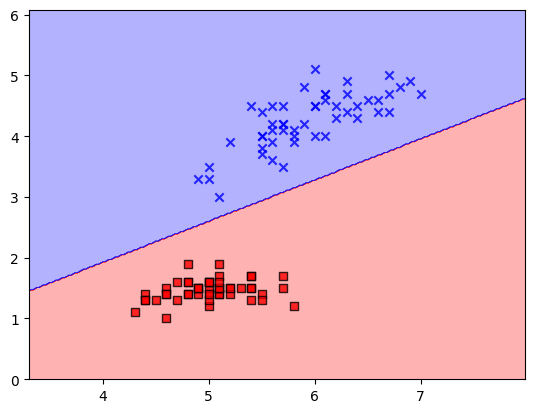

In [13]:
plot_decision_regions(X, y, ppn)

# 파이썬으로 아달린 구현하기

In [14]:
# 뉴런1개 만드는 작업 - 활성화함수를 갈아끼울 수 있는 뉴런(Adaptive Linear Neuron)
class AdalineGD(object):
    # __init__ - 기본적인 하이퍼파라미터들을 속성으로 가지고 있어야 할 것
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta= eta
        self.n_iter = n_iter
        self.random_state=random_state

    # fit - 학습시키기 위한 함수
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
                # 들어오는 독립변수(X) 차원의 개수만큼 초기 가중치를 랜덤세팅하기 위한 코드
        self.cost_ = [] # 에포크를 학습할 때마다 누적한 비용의 누적합 저장

        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    # net_input - 학습이 완료된 모델에 새로 들어온 데이터를 계산하는 함수
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # 활성화함수 - 선형함수 사용 - 비용함수를 미분으로 측정 가능해짐
    def activation(self, X):
        return X

    # predict - 계산의 결과를 출력하는 함수
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.1, 1, -1)


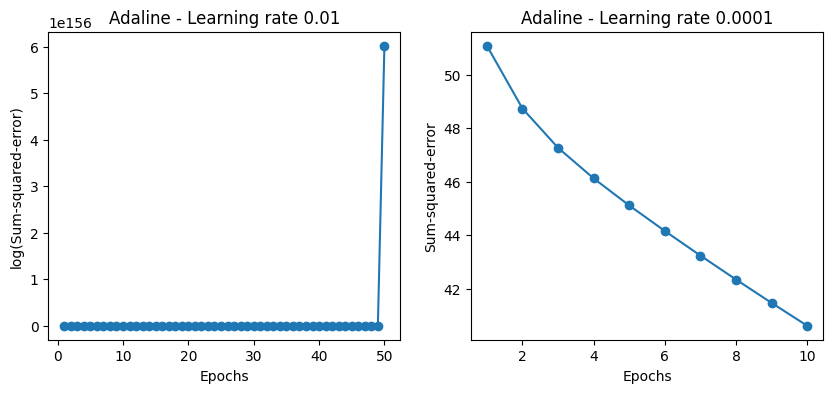

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=50, eta=0.01).fit(X, y)
# ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [16]:
# X 0, X 2 두개의 스케일이 달라서 생기는 특정 가중치에 편향되는 학습을 막기 위해 평균 0, 표준편차 1이 되도록 표준화합니다.
X_std = np.copy(X)

X_std[:, 0] = (X_std[:, 0] - X_std[:, 0].mean()) / X_std[:, 0].std()
X_std[:, 1] = (X_std[:, 1] - X_std[:, 1].mean()) / X_std[:, 1].std()

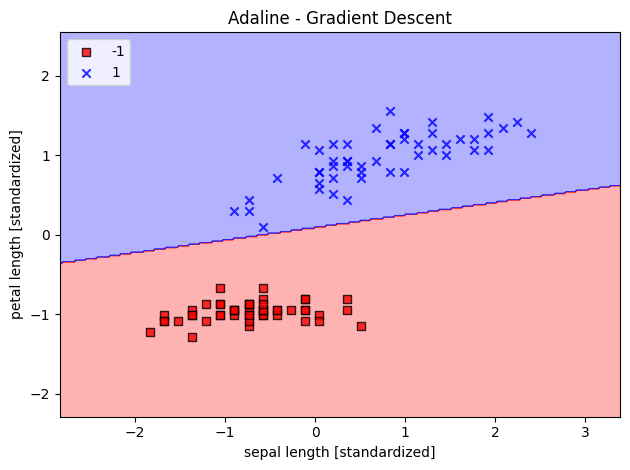

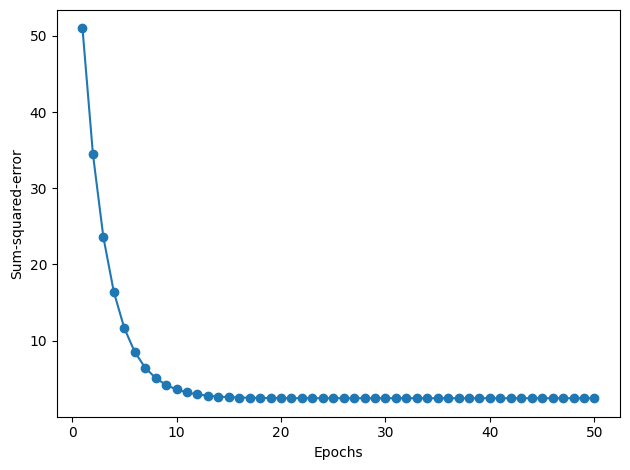

In [17]:
ada_gd3 = AdalineGD(n_iter=50, eta=0.01)
ada_gd3.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd3)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd3.cost_) + 1), ada_gd3.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

# 지도 학습-분류 + Scikitlearn

- 사이킷런 첫걸음: 퍼셉트론 훈련
- 로지스틱 회귀를 사용한 클래스 확률 모델링
  - 로지스틱 회귀의 이해와 조건부 확률
  - 로지스틱 비용 함수의 가중치 학습
  - 아달린 구현을 로지스틱 회귀 알고리즘으로 변경
  - 사이킷런을 사용하여 로지스틱 회귀 모델 훈련
  - 규제를 사용하여 과대적합 피하기
- 서포트 벡터 머신을 사용한 최대 마진 분류
  - 최대 마진
  - 슬랙 변수를 사용하여 비선형 분류 문제 다루기
  - 사이킷런의 다른 구현
초평면 찾기
- 결정 트리 학습
  - 정보 이득 최대화: 자원을 최대로 활용
  - 결정 트리 만들기
  - 랜덤 포레스트로 여러 개의 결정 트리 연결
- k-최근접 이웃: 게으른 학습 알고리즘

# 3.1. Scikit-learn
![scikit-learn logo.png](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)
- https://scikit-learn.org/stable/#
- 다양한 머신러닝 관련한 기술들을 통일되고 쉬운 인터페이스로 사용할수 있게 해주는 라이브러리
- 머신러닝 관련 알고리즘과 개발을 위한 프레임워크와 API 제공

### API 사용 방법

- 1) Scikit-Learn에서 적절한 estimator 클래스를 임포트해서 모델의 클래스 선택
- 2) 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택
- 3) 데이터를 특징 배열과 대상 벡터로 배치
- 4) 모델 인스턴스의 **fit()** 메서드로 모델을 데이터에 적용
- 5) 모델을 새 데이터에 적용
  + 지도 학습(분류, 회귀 등): **predict()** 메서드로 알려지지 않은 데이터에 대한 레이블 예측
  + 비지도 학습(차원 축소, 클러스터링, 피처 추출 등): **transform()**이나 **predict()** 메서드로 데이터의 특성을 변환하거나 추론.
    - fit()과 transform()을 한번에 수행하는 fit_transform()도 존재.


### Estimator API
- 알고리즘이나 주요 피처를 추출, 필터링하는 사이킷런의 transformer
- 사이킷런은 알고리즘을 작성하는 방법을 통일된 방식으로 제공
- 알고리즘만 파이썬 클래스로 작성하고
  데이터 세트는 표준 포맷(NumPy 배열, Pandas DataFrame, Scipy 희소 행렬)이기 때문에 가능
```
    estimator = Estimator(param1=1, param2=2)
    estimator.param1
```
- 효과:
    - 사용법 단일화
    - 사용자 지정 파라미터에 대해 모델 API가 적절한 기본값을 제공

## scikit-learn이 제공하는 주요 모듈

| 모듈 | 설명 |
|------|------|
| sklearn.datasets | 내장 예제 세트 |
| sklearn.preprocessing |데이터 전처리 기능 모듈(변환, 정규화, 스케일링 등) |
| sklearn.feature_selection | 특성(feature)를 선택할 수 있는 기능 |
| sklearn.feature_extraction | 특성(feature) 추출 |
| sklearn.decomposition | 차원 축소에 관한 알고리즘 지원 (PCA, NMF, Truncated SVD 등)
| sklearn.model_selection | 교차 검증을 위한 데이터를 학습/테스트용으로 분리, 최적 파라미터를 추출하는 API를 제공하는 모듈 (GridSearch 등)
| sklearn.metrics | 분류, 회귀, 클러스터링, Pairwise에 대한 다양한 성능 측정 방법에 관한 모듈 (Accuracy, Precision, Recall, ROC-AUC, RMSE 등) |
| sklearn.pipeline | 특성 처리 등의 변환과 ML 알고리즘 학습, 예측을 묶어서 실행할 수 있는 유틸리티 제공 |
| sklearn.linear_model | 선형 회귀, 릿지(Ridge), 라쏘(Lasso), 로지스틱 회귀 등 회귀 관련 알고리즘 및 SGD(Stochastic Gradient Descent) 알고리즘을 제공하는 모듈 |
| sklearn.svm | 서포트 벡터 머신 알고리즘 모듈 |
| sklearn.neighbors | 최근접 이웃 알고리즘 제공 모듈(k-NN 등)
| sklearn.naive_bayes | 나이브 베이즈 알고리즘 제공 모듈 (가우시안 NB, 다항 분포 NB 등) |
| sklearn.tree | 의사 결정 트리 알고리즘 모듈 |
| sklearn.ensemble | 앙상블 알고리즘 모듈 (Random Forest, AdaBoost, GradientBoost 등) |
| sklearn.cluster | 비지도 클러스터링 알고리즘 제공 모듈 (k-Means, 계층형 클러스터링, DBSCAN 등)

## 제공 데이터 셋

| 데이터 로드 함수 | 데이터설명	| 참고 |
|------|------|-|
| load_boston | 보스턴 집값 | 내장데이터  |
| load_diabetes | 당뇨병 자료 |  |
| load_linnerud | linnerud 자료 |  |
| load_iris | 붓꽃자료 |  |
| load_digits | 필기 숫자(digit)이미지 |  |
| load_wine | 포도주(wine) 등급 |  |
| load_breast_cancer | 유방암진단 자료 |  |
| fetch_california_housing | 캘리포니아 집값 자료 | 인터넷 다운로드 |
| fetch_covtype | 토지조사 자료 |  |
| fetch_20newsgroups | 뉴스 그룹 텍스트 자료 |  |
| fetch_olivetti_faces | 얼굴 이미지 자료 |  |
| fetch_lfw_people | 유명인 얼굴 이미지 |  |
| fetch_lfw_pairs | 유명인 얼굴 이미지 |  |
| fetch_rcv1 | 로이터 뉴스 말뭉치 |  |
| fetch_kddcup99 | Kddcup 99 Tcp dump |  |
| make_regression | 회귀분석용 | 가상데이터 |
| make_classification | 분류용 |  |
| make_blobs | 클러스터링용 |  |

- 데이터 형식: Bunch라는 클래스 객체로 생성 (dict와 유사)
    - data: (필수) 독립 변수 ndarray 배열
    - target: (필수) 종속 변수 ndarray 배열
    - feature_names: (옵션) 독립 변수 이름 리스트
    - target_names: (옵션) 종속 변수 이름 리스트
    - DESCR: (옵션) 자료에 대한 설명

In [18]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [19]:
import sklearn

In [20]:
sklearn.datasets

<module 'sklearn.datasets' from '/usr/local/lib/python3.11/dist-packages/sklearn/datasets/__init__.py'>

In [22]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [23]:
iris.data # X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [24]:
iris.target # 0, 1, 2 y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
iris.frame # 이미지데이터 행렬에만 들어있음

In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

**1단계 : 데이터 셋 분리**

`sklearn.model_selection`의 `train_test_split`은 클래스 이름 그대로 **학습과 검증 (혹은 테스트) 셋**을 나누어 주는 역할을 합니다. 학습 (Train) / 검증 (Validation or Test) 세트로 나누며, 검증 세트로 1) **과대 적합**여부, 2) 모델의 성능 평가를 진행할 수 있습니다.

- 학습을 위한 다양한 피처와 분류 결정값인 레이블 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측
→ 지도학습은 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식

- 학습 데이터(training data) 세트
    - 학습을 위해 주어진 데이터 세트
    - 많을수록 유리

- 테스트 데이터(test data) 세트
    - 머신러닝 모델의 예측 성능 평가를 위해 주어진 데이터 세트
    - 학습에 사용되지 않은 데이터이어야 함

- 검증 데이터(validation data) 세트
    - 학습 과정에서 학습을 중단할 시점을 결정하기 위해 사용하는 데이터 세트


**하이퍼파라미터 튜닝**

성능 향상을 위해서 개발자들이 직접 입력하는 수치값들 의미 <br>

**주요 hyperparameter**

* `test_size`: validation set에 할당할 비율 (20% -> 0.2), 기본값 0.25
* `stratify`: 분할된 샘플의 class 갯수가 동일한 비율로 유지
* `random_state`: 랜덤 시드값
* `shuffle`: 셔플 옵션, 기본값 True

하이퍼파라미터값 수정하면서 평가해 보기

In [29]:
X = iris.data
y = iris.target

70%는 훈련 데이터 30%는 테스트 데이터로 분할합니다:

In [31]:
from sklearn.model_selection import train_test_split

# shuffle 기본값은 true
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

len(X_train), len(X_test), len(y_train),len(y_test)

(105, 45, 105, 45)

In [32]:
X_train[:2]

array([[6.4, 2.8, 5.6, 2.2],
       [5.5, 2.5, 4. , 1.3]])

In [33]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

# 드물게 일어나는 사건을 학습시키고, 드물게 일어나는 사건에 대해 테스트해야 하는 경우
# 10만건 1건의 비율로 발생하는 것처럼 판단하고자 하는 라벨의 비율이 현격하게 차이날 때는 stratify

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [36 33 36]
y_test의 레이블 카운트: [14 17 14]


In [38]:
# 모델(Estimator), 모델에 넣을 데이터를 전처리하기 위한 패키지
from sklearn.preprocessing import StandardScaler # 평균 0, 분산 1로 각 스케일을 표준화

# 객체를 만든다
std = StandardScaler()


# 객체에 우리가 가진 데이터를 fit한다
std.fit(X_train)


# fit을 통해 만들어진 mean_, var_을 바탕으로 데이터를 실제로 변형한다.
X_train_std = std.transform(X_train)

In [35]:
std.scale_, std.mean_, std.var_

(array([0.8399838 , 0.46843784, 1.78952508, 0.76774193]),
 array([5.86285714, 3.07428571, 3.76      , 1.20095238]),
 array([0.70557279, 0.21943401, 3.2024    , 0.58942766]))

In [36]:
X.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [42]:
# III. 모델을 만들어서 데이터를 넘겨줌
from sklearn.linear_model import Perceptron

# 1. 모델을 만든다(알고리즘을 선택한다)
ppn = Perceptron()

# 2. 모델에 우리의 데이터를 입힌다.
ppn.fit(X_train_std, y_train) # 지도학습 - 분류모델

X_test_std = std.transform(X_test) # X_train의 평균과 분산을 기준으로 새로 들어온 데이터를 표준화
# 3. 처음보는 데이터(X_test)와 답지(y_test)를 넘겨줬을 때 전체 중에 몇개를 맞췄는지를 백분율로 환산
# accuracy_score라고 부릅니다.
ppn.score(X_test_std, y_test)

0.6222222222222222

In [46]:
ppn.classes_

array([0, 1, 2])

In [43]:
ppn.coef_

# array([[-0.8333494 ,  1.92127944, -1.17349571, -1.43277313],
#        [-0.96600502,  0.68922088,  2.11229228, -2.86182477],
#        [-0.14626132,  0.52453978,  5.28631877,  7.17130862]])

array([[-0.8333494 ,  1.92127944, -1.17349571, -1.43277313],
       [-0.96600502,  0.68922088,  2.11229228, -2.86182477],
       [-0.14626132,  0.52453978,  5.28631877,  7.17130862]])

In [47]:
X_test[0], y_test[0]

(array([6.6, 3. , 4.4, 1.4]), 1)

In [48]:
X_test_std = std.transform(X_test) # X_train의 평균과 분산을 기준으로 새로 들어온 데이터를 표준화
# 3. 처음보는 데이터(X_test)와 답지(y_test)를 넘겨줬을 때 전체 중에 몇개를 맞췄는지를 백분율로 환산
# accuracy_score라고 부릅니다.
ppn.score(X_test_std, y_test)

0.6222222222222222

In [52]:
# I. 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:, [2,3]], y, test_size=0.1, random_state=42, stratify=y)


# II. 데이터 전처리
from sklearn.preprocessing import StandardScaler # 평균 0, 분산 1로 각 특성의 스케일을 표준화

# 1. 객체를 만든다
std = StandardScaler()

# 2. 객체에 우리가 가진 데이터를 fit 한다. train데이터 기준으로
std.fit(X_train) # 실제 훈련에 사용할 X_train의 정보 기준

# 3. fit을 통해 만들어진 mean_, var_을 바탕으로 데이터를 실제로 변형한다.
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test) # X_train의 평균과 분산을 기준으로 모르는 데이터를 표준화


# III. 모델을 만들어서 데이터를 넘겨줌
from sklearn.linear_model import Perceptron

# 1. 모델을 만든다(알고리즘을 선택한다)
ppn = Perceptron()

# 2. 모델에 우리의 데이터를 입힌다.
ppn.fit(X_train_std, y_train) # 지도학습 - 분류모델

# 3. 처음보는 데이터(X_test)와 답지(y_test)를 넘겨줬을 때 전체 중에 몇개를 맞췄는지를 백분율로 환산
# accuracy_score라고 부릅니다.
ppn.score(X_test_std, y_test)

#ppn.predict(X_test_std)

0.9333333333333333

In [54]:
std.inverse_transform(X_test_std)

array([[4.6, 1.3],
       [5.6, 1.4],
       [5.2, 2. ],
       [3.9, 1.1],
       [6.3, 1.8],
       [1.3, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [5.6, 2.2],
       [4.4, 1.4],
       [1.2, 0.2],
       [5.5, 1.8],
       [4.5, 1.5],
       [5. , 1.7],
       [1.4, 0.2]])

In [55]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor=None if idx==1 else 'black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

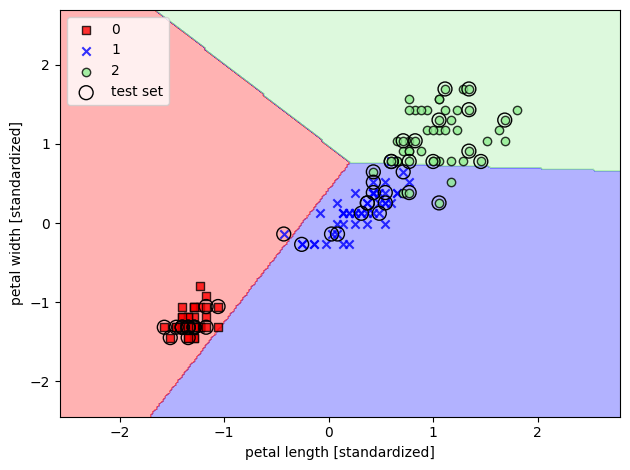

In [56]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_01.png', dpi=300)
plt.show()

# 로지스틱 회귀를 사용한 클래스 확률 모델링

## 로지스틱 회귀의 이해와 조건부 확률



# Logistic Regression

- 선형 회귀 방식을 이용한 이진 분류 알고리즘
- 분류 레이블: 0 or 1
- 0~1 범위를 예측 결과로 가지는 모델 필요
    - Sigmoid 함수를 활용해 타깃값에 포함될 확률을 예측
- Logistic, sigmoid 함수
    - S자 모양의 함수

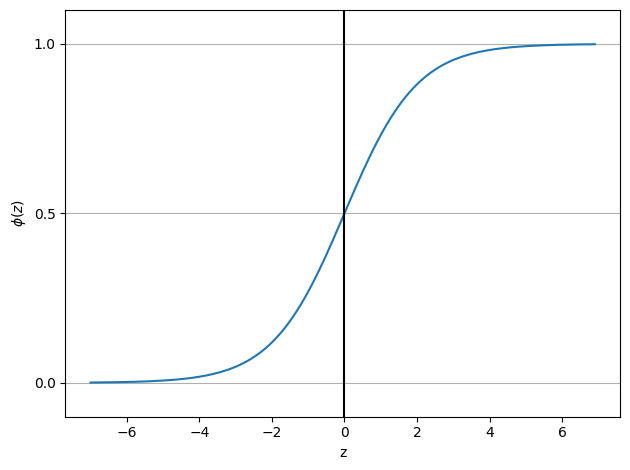

In [57]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('images/03_02.png', dpi=300)
plt.show()

## 시그모이드 함수의 이해

$\frac{1}{1} = 1$인데, 분모 1에다 0보다 크거나 같은 어떤 수를 더 하면 그 결과는 1 보다 클수 없다.

분모에 더 할 값은 $e^{-z}$, 이 값은 어떤 $z$가 주어져도 0보다 작아 지지 않는다.

$e^{-z}$는 $z$의 값이 크면 클 수록 0에 가까운 작은 수가 되고 $z$값이 작으면 무한대에 가까운 큰 수가 된다

따라서 $z$의 값이 크면 $e^{-z}$의 값이 작아져서 $\frac{1}{1+e^{-z}}$의 값은 1에 가까워 지고 그 반대는 0에 가까워 진다.

### 로지스틱 비용 함수의 가중치 학습


* sklearn API
    * `sklearn.linear_model.LogisticRegression`

- 생성된 회귀 모델에 대한 평가를 위해 LinearRegression 객체에는 두 개의 속성 값을 간직합니다.
* intercept_: 추정된 상수항
* coef_: 추정된 가중치 벡터

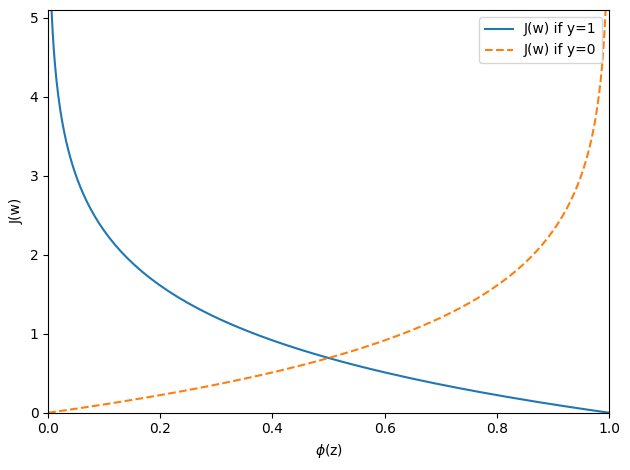

In [59]:
# 학습을 더 많이 시켜야겠죠... 오차의 크기를 선형으로 누적합해서 비용으로 계산하지 않고, 0~1의 확률로 변경해서 계산하기 때문에
# 너무 멀리 떨어진 지점(당연히 분류되는 지점)에 대해서는 학습에 비용을 반영할 때 가중치를  덜 줄 수 있다
# 결정경계에 가까운, 너무 가까워서 분류하기 애매한 값들에 대해서는 더 큰 가중치를 담아서 학습시킬 수 있다(0.5 근처에서는 기울기가 가파르기 때문에)
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/03_04.png', dpi=300)
plt.show()

# 아달린 구현을 로지스틱 회귀 알고리즘으로 변경

In [60]:
class LogisticRegressionGD(object):
    """경사 하강법을 사용한 로지스틱 회귀 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 로지스틱 비용 함수 값

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # 오차 제곱합 대신 로지스틱 비용을 계산합니다.
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) # 비용 변경
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """로지스틱 시그모이드 활성화 계산"""
        # 대신 from scipy.special import expit; expit(z) 을 사용할 수 있습니다.
        return 1. / (1. + np.exp(-np.clip(z, -250, 250))) # activation 함수를 sigmoid로 변경

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        # return np.where(self.net_input(X) >= 0.0, 1, 0)
        # 다음과 동일합니다.
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [61]:
# I. 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:100, [2,3]],y[:100], test_size=0.3, random_state=42, stratify=y[:100])


# II. 데이터 전처리
from sklearn.preprocessing import StandardScaler # 평균 0, 분산 1로 각 특성의 스케일을 표준화

# 1. 객체를 만든다
std = StandardScaler()

# 2. 객체에 우리가 가진 데이터를 fit 한다. train데이터 기준으로
std.fit(X_train) # 실제 훈련에 사용할 X_train의 정보 기준

# 3. fit을 통해 만들어진 mean_, var_을 바탕으로 데이터를 실제로 변형한다.
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test) # X_train의 평균과 분산을 기준으로 모르는 데이터를 표준화



In [62]:
y_test

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0])

In [63]:
lrgd = LogisticRegressionGD()
lrgd.fit(X_train_std, y_train)

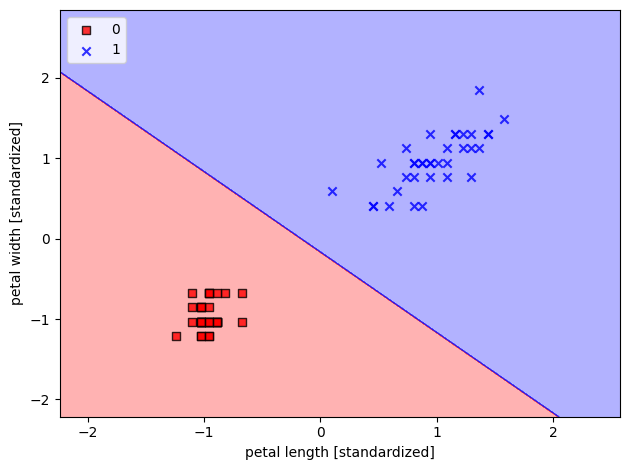

In [64]:

plot_decision_regions(X=X_train_std,
                      y=y_train,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_05.png', dpi=300)
plt.show()

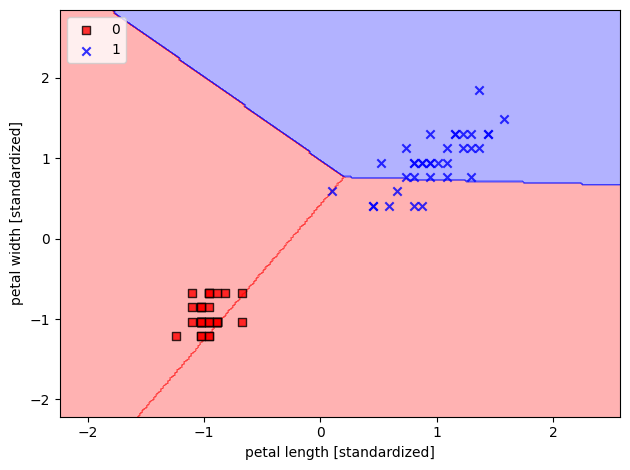

In [65]:

plot_decision_regions(X=X_train_std,
                      y=y_train,
                      classifier=ppn)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_05.png', dpi=300)
plt.show()

# Sklearn을 사용해 로지스틱 회귀 모델 훈련하기

In [66]:
from sklearn.linear_model import LogisticRegression

# 1. 클래스를 활용해서 모델 인스턴스를 만든다
lr = LogisticRegression()

# 2. 우리가 가진 훈련데이터로 모델을 학습시킨다 - fit()
lr.fit(X_train_std,  y_train)

# 화면을 그려볼게요
lr.score(X_test_std, y_test)

1.0

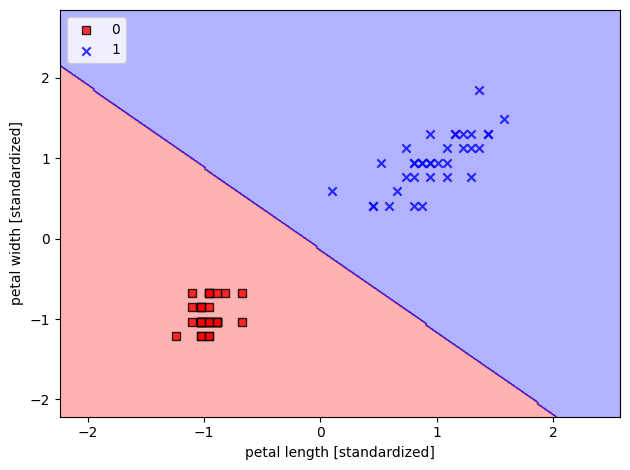

In [67]:
plot_decision_regions(X=X_train_std,
                      y=y_train,
                      classifier=lr)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_05.png', dpi=300)
plt.show()

In [68]:
# OvR 여러개의 만들어서 여러개의 클래스를 분류하는 것을 가능하게 해줍니다.
# I. 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:, [2,3]],y, test_size=0.3, random_state=42, stratify=y)


# II. 데이터 전처리
from sklearn.preprocessing import StandardScaler # 평균 0, 분산 1로 각 특성의 스케일을 표준화

# 1. 객체를 만든다
std = StandardScaler()

# 2. 객체에 우리가 가진 데이터를 fit 한다. train데이터 기준으로
std.fit(X_train) # 실제 훈련에 사용할 X_train의 정보 기준

# 3. fit을 통해 만들어진 mean_, var_을 바탕으로 데이터를 실제로 변형한다.
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test) # X_train의 평균과 분산을 기준으로 모르는 데이터를 표준화


# III. 모델을 만들어서 데이터를 넘겨줌
from sklearn.linear_model import LogisticRegression

# 1. 모델을 만든다(알고리즘을 선택한다)
lr_1 = LogisticRegression()

# 2. 모델에 우리의 데이터를 입힌다.
lr_1.fit(X_train_std, y_train) # 지도학습 - 분류모델

# 3. 처음보는 데이터(X_test)와 답지(y_test)를 넘겨줬을 때 전체 중에 몇개를 맞췄는지를 백분율로 환산
# accuracy_score라고 부릅니다.
lr_1.score(X_test_std, y_test)

# lr_1.predict(X_test_std)

0.9111111111111111

In [69]:
lr_1.predict(X_test_std)

array([2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 2,
       1])

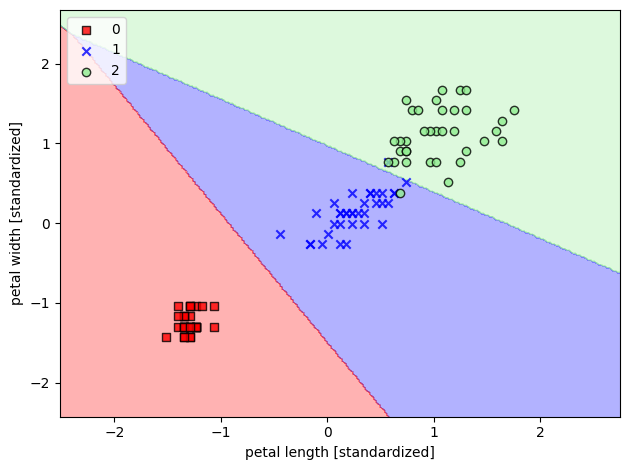

In [70]:
plot_decision_regions(X=X_train_std,
                      y=y_train,
                      classifier=lr_1)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_05.png', dpi=300)
plt.show()

# 규제를 사용해 과대적합 피하기

- 훈련 데이터를 여러번 반복학습하고 나면 어느 순간부터는 모델이 일반화(새로 들어오는 데이터를 추론하는 능력) 성능은 오히려 떨어지면서, 훈련 데이터에만 너무 높은 적중률을 보이게 됩니다
- 이를 막기 위해서 새로운 데이터를 모아서 주면 되겠지만 -> 쉬운 일이 아닙니다.
- 모델한테 기존에 배웠던 정보들을 다시 받을 때 그 때 제약을 가해서 중요한 패턴에 집중을 하게 합니다.
- 규제는 지금까지의 학습으로 만들어진 결정경계가 다시 데이터를 받아들일 때 중요한 패턴만 취하도록 '강제'하는 역할

- l1 규제 - 가중치의 절대값에 비례하도록 비용을 추가
- l2 규제 - 가중치의 제곱에 비례하도록 비용을 추가
- C 라는 옵션으로 제어합니다. C = Compression의 약자입니다.

In [ ]:
# yhat = w1x1 + w2x2 + w0 + 가중치의 합(w1+w2+w3)
# 음수/ 양수의 방향성 상관없이 크기만 반영하게 하기 위해서

L2 규제(L2 노름의 제곱) : $\lVert\boldsymbol{w}\rVert^2_2=\sum_{j=1}^m w_j^2$

L1 규제(L1 노름) : $\lVert\boldsymbol{w}\rVert_1=\sum_{j=1}^m \left|w_j\right|$

규제가 추가된 비용 함수 : $J(\boldsymbol w)=-\sum^n_{i=1}\left[y^{(i)}\text{log}\phi(z^{(i)})+(1-y^{(i)})\text{log}\left(1-\phi(z^{(i)})\right)\right]+\dfrac{\lambda}{2}\sum_{j=1}^m w_j^2$

- `C`는 $\lambda$의 역수로 증가시키면 규제가 작아지고, 감소시키면 규제가 커짐. 기본값은 1.0
- `penalty` 매개변수 기본값 `'l2'`, L1 규제를 위해 `'l1'`을 지정할 수 있음.

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

# OvR 여러개의 만들어서 여러개의 클래스를 분류하는 것을 가능하게 해줍니다.
# I. 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:, [2,3]],y, test_size=0.3, random_state=42, stratify=y)


# II. 데이터 전처리
from sklearn.preprocessing import StandardScaler # 평균 0, 분산 1로 각 특성의 스케일을 표준화

# 1. 객체를 만든다
std = StandardScaler()

# 2. 객체에 우리가 가진 데이터를 fit 한다. train데이터 기준으로
std.fit(X_train) # 실제 훈련에 사용할 X_train의 정보 기준

# 3. fit을 통해 만들어진 mean_, var_을 바탕으로 데이터를 실제로 변형한다.
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test) # X_train의 평균과 분산을 기준으로 모르는 데이터를 표준화

In [2]:
# C(규제)의 역할: 과대적합을 피하기 위해 데이터포인트 하나하나가 가중치들에 미치는 영향력을 제어합니다.
# C는 역수로 작용합니다.
# C를 주는 방법은 l1(절대값), l2(제곱합)을 사용하는 방법이 있습니다.
# l1을 적용할 때는 같은 값을 C(짐)으로 만나는 경우가 더러 있습니다.
# l2를 적용할 때는 매번 다른 C(짐)을 적용시키게 됩니다.
# w들은 초기화될 때 0 가까운 값에서 매겨졌기 때문에 0 가까운 값일 때 데이터의 패턴을 덜 배웠다.


# w1x1 + w2x2 + w0 + C*(짐) = yhat

# III. 모델을 만들어서 데이터를 넘겨줌
from sklearn.linear_model import LogisticRegression

# 1. 모델을 만든다(알고리즘을 선택한다)
lr_1 = LogisticRegression() # C=역수로 작용

# 2. 모델에 우리의 데이터를 입힌다.
lr_1.fit(X_train_std, y_train) # 지도학습 - 분류모델

# 3. 처음보는 데이터(X_test)와 답지(y_test)를 넘겨줬을 때 전체 중에 몇개를 맞췄는지를 백분율로 환산
# accuracy_score라고 부릅니다.
lr_1.score(X_test_std, y_test)

print(lr_1.intercept_) # 상수항
print(lr_1.coef_) # feature에 대한 가중치들 0을 분류하는 분류경계
print(lr_1.score(X_test_std, y_test)) # 처음보는 데이터에 대한 맞추는 비율(Accuracy)


# -6.59964583 * f1 +  -6.10325661* f2  + -0.9561477 = yhat / l2(제곱): C = 100
# -0.27938752  * f1 + -0.26414608 * f2 + -0.0530014 = yhat / l2: C = 0.01

# -2.32854437 * f1 + -2.10201164 * f2 + -0.60039568 = yhat / l2(제곱): C = 1 (1)

# -6.59880142 * f1 +  -6.58686101 * f2 +  -8.21906184  = yhat / l1 C = 100
# 0* f1 +  0 * f2 + 0  = yhat / l1 C = 0.01

[-0.60039568  1.80514588 -1.2047502 ]
[[-2.32854437 -2.10201164]
 [ 0.26475058 -0.4942414 ]
 [ 2.06379379  2.59625304]]
0.9111111111111111


# 서포트 벡터 머신을 사용한 최대 마진 분류

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor=None if idx==1 else 'black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

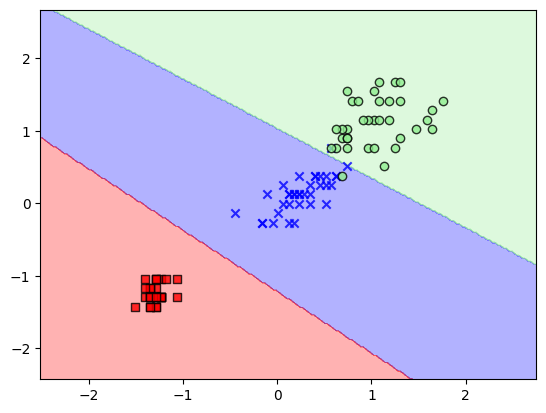

In [7]:
# 모델 import
from sklearn.svm import SVC

# 모델을 인스턴스화
svm = SVC(kernel='linear')

# 현재 결정경계와 가장 가까이 있는 점들을 기준으로 최대한 반반으로 나눌 수 있는 새 결정경계를 만듭니다
svm.fit(X_train_std, y_train)

svm.score(X_test_std, y_test)

plot_decision_regions(X=X_train_std, y=y_train, classifier=svm)
# gamma 값이라는 옵션을 통해서 각 데이터 포인트가 영향력을 행사하는 거리를 줄 수 있습니다.
# gamma는 작을수록 커지고, 클수록 하나의 데이터포인트가 주는 영향력이 작아집니다


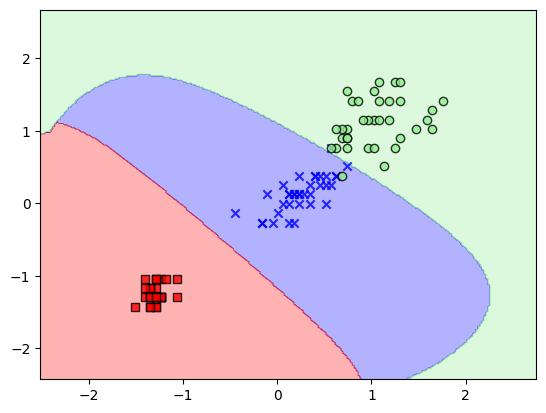

In [8]:
# 모델 import
from sklearn.svm import SVC

# 모델을 인스턴스화
# gamma 값이라는 옵션을 통해서 각 데이터 포인트가 영향력을 행사하는 거리를 줄 수 있습니다.\
# gamma는 데이터포인트들 쪽으로 기울기를 끌고 하는 힘입니다. 원래값 그대로 적용합니다.
# svm = SVC(kernel='rbf', gamma=10) # radial basis function - 3차원으로 차원을 높여서 새로 z축을 데이터간의 거리 중심으로 계산 -> 많이 몰려있는 방향으로 세번째 축을 만들어서
# C는 기울기를 원래상태로 유지하려는 힘입니다. 역수로 작용합니다.
svm = SVC(kernel='rbf', C=0.01)
# 현재 결정경계와 가장 가까이 있는 점들을 기준으로 최대한 반반으로 나눌 수 있는 새 결정경계를 만듭니다
svm.fit(X_train_std, y_train)

svm.score(X_test_std, y_test)

plot_decision_regions(X=X_train_std, y=y_train, classifier=svm)


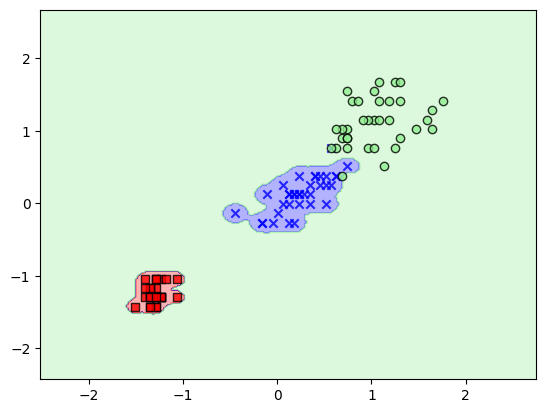

In [9]:
# 모델 import
from sklearn.svm import SVC

# 모델을 인스턴스화
# gamma 값이라는 옵션을 통해서 각 데이터 포인트가 영향력을 행사하는 거리를 줄 수 있습니다.\
# gamma는 데이터포인트들 쪽으로 기울기를 끌고 하는 힘입니다. 원래값 그대로 적용합니다.
# svm = SVC(kernel='rbf', gamma=10) # radial basis function - 3차원으로 차원을 높여서 새로 z축을 데이터간의 거리 중심으로 계산 -> 많이 몰려있는 방향으로 세번째 축을 만들어서
# C는 기울기를 원래상태로 유지하려는 힘입니다. 역수로 작용합니다.
svm = SVC(kernel='rbf', gamma=100)
# 현재 결정경계와 가장 가까이 있는 점들을 기준으로 최대한 반반으로 나눌 수 있는 새 결정경계를 만듭니다
svm.fit(X_train_std, y_train)

svm.score(X_test_std, y_test)

plot_decision_regions(X=X_train_std, y=y_train, classifier=svm)


# 사이킷런의 다른 구현

- 선형적으로 구분되지 않는 데이터를 위한 방법

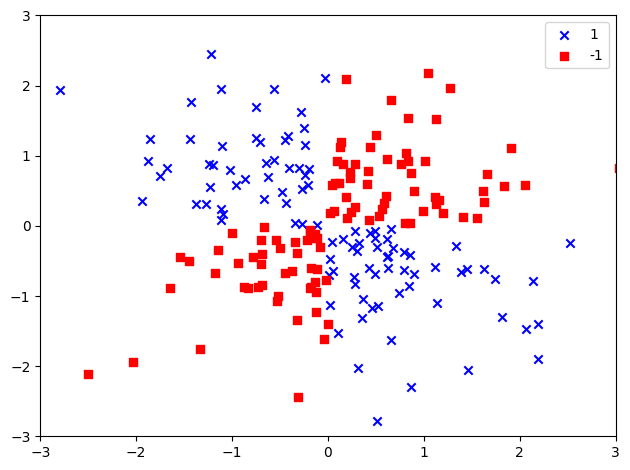

In [10]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/03_12.png', dpi=300)
plt.show()

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_xor, y_xor, test_size=0.2, random_state=42)

# 모델에 fit 하기
svm = SVC(gamma=3, C=0.1)
svm.fit(X_train, y_train)

# 모델로 X_test, y_test 데이터를 넘겨주고 predict, score 한다
svm.score(X_test, y_test)

0.975

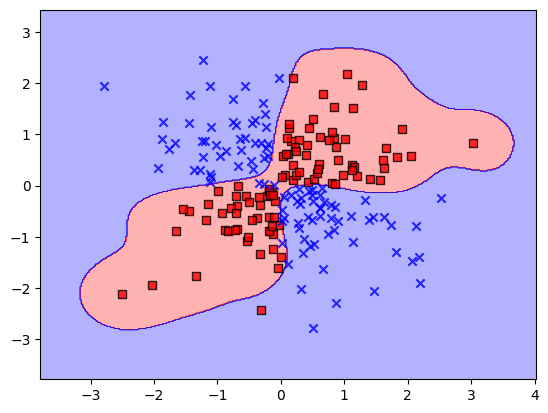

In [19]:
plot_decision_regions(X_xor, y_xor, svm)

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


# 1. 데이터를 분리한다
X_train, X_test, y_train, y_test =train_test_split(X_xor, y_xor, test_size=0.2, random_state=42)

# 2. 모델에 fit한다
svm = SVC(gamma=0.01, C=1000)
svm.fit(X_train, y_train)

# 3. 모델로 X_test, y_test 데이터를 넘겨주고 predict / score 한다.
svm.score(X_test, y_test)

# 4. 정확도가 높지 않다면 2로 돌아가서 우리가 사용할 수 있는 하이퍼파라미터들을 변경해본다.

0.95

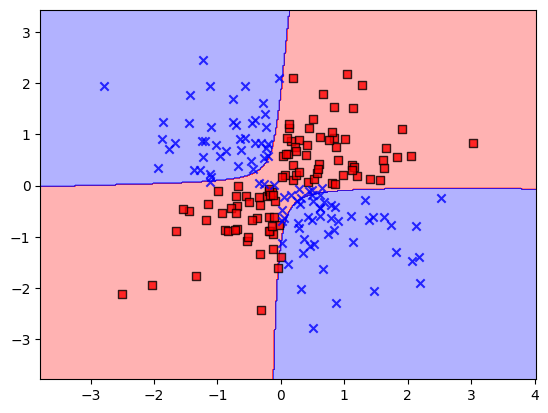

In [21]:
plot_decision_regions(X_xor, y_xor, svm)

In [ ]:
# 장점 : 꽤 괜찮은 성능을 보인다.
# 단점: 데이터가 많아지면 계산하는 시간이 많이 걸린다. 설명하기가 쉽지 않다.

# 결정 트리 학습 (정보 이득 최대화 - 자원을 최대로 활용하기)

## 결정트리(decision tree) 알고리즘

1. 데이터에 있는 규칙을 학습을 통해 자동으로 찾아 tree 기반의 분류 규칙 적용
2. 트리를 어떻게 분할할 것인가가 중요

**결정트리에 사용되는 CART 알고리즘**
- 노드를 왼쪽, 오른쪽 자식 노드로 분할 확장하면서 트리를 생성
- 분할 단계에서 가장 중요한 특징과 해당 값의 모든 가능한 조합을 측정 함수를 이용해 탐욕적으로 측정함.
- 범주형 특징은 해당 특징 값을 가진 샘플들을 오른쪽 자식 노드에 할당
- 수치형 특징의 경우 해당 값보다 큰 값을 가진 샘플들을 오른쪽 자식 노드에 할당함

**그래프 구조**

1. root 노드 : 최상위 node
2. 규칙 노드(Decision Tree) = 규칙 조건
3. 리프 노드 = 결정된 클래스값  (리프노드에 도달하면 더이상 자식 노드가 없다)

<hr>

**주의사항**

1. tree 깊이가 깊어질수록 결정 tree의 예측 성능이 저하될 수도 있음
2. 가급적 최대한 균일한 데이터 세트를 구성할 수 있도록 분할할 수 있게 해야 함



**graphic에 표현된 문구들**

1. gini : value=[]로 주어진 데이터 분포의 지니계수
2. samples : 한 규칙에 해당하는 데이터 건수
3. value = [] : 클래스 값 기반의 데이터 건수

**균일도 측정 방법**

1. 균일도가 높은 동일한 형식들의 데이터들로 구성되어 있다로 간주
2. 가령 : 검정색 바둑알로만 되어 있으면 균일도가 높음, 검정색 바둑알에 흰색에 조금 섞여 있다면 균일도가 중간, 흰색이 너무 많다는 건 균일도가 낮다로 간주
3. 결정노드는 정보를 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙을 구성한다

**원리 : 균일도가 높은 데이터화**

1. 지니 계수 사용 : 균일도 측정하는 방법
2. 지니 계수란? 경제학에서 불평등 지수를 나타낼 때 사용하는 계수, 0에 가까울수록 가장 평등하고, 1에 가까울수록 불평등
3. sklearn API 관점 : 데이터 세트를 분할하는데 가장 좋은 조건, 즉 정보 이득이나 지니계수가 높은 조건을 찾아서 자식 tree node에 반복적으로 분할한 뒤 데이터가 모두 특정 분류에 속하게 되면 분할 stop 후 결정

# 지니계수
- 공평하게 섞여 있을 수록 지니 계수는 올라감
- Decision Tree는 지니 불순도를 낮추는 방향으로 가지치기를 진행

In [23]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

# OvR 여러개의 만들어서 여러개의 클래스를 분류하는 것을 가능하게 해줍니다.
# I. 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:, [2,3]],y, test_size=0.3, random_state=42, stratify=y)

In [24]:
from sklearn.tree import DecisionTreeClassifier


tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)
tree_model.score(X_test, y_test)

0.9333333333333333

In [25]:
tree_model.n_classes_ # 3개의 클래스로 나눔
tree_model.n_features_in_ # 2개의 특성을 받음
tree_model.n_outputs_ # 1의 결과가 나옴
tree_model.tree_

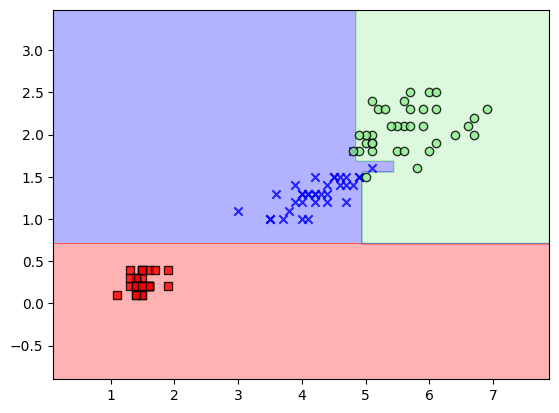

In [26]:
plot_decision_regions(X_train, y_train, tree_model)

[Text(0.3333333333333333, 0.9166666666666666, 'x[1] <= 0.7\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.2222222222222222, 0.75, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.2777777777777778, 0.8333333333333333, 'True  '),
 Text(0.4444444444444444, 0.75, 'x[1] <= 1.55\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.38888888888888884, 0.8333333333333333, '  False'),
 Text(0.2222222222222222, 0.5833333333333334, 'x[0] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.1111111111111111, 0.4166666666666667, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.5833333333333334, 'x[0] <= 4.85\ngini = 0.105\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(0.5555555555555556, 0.4166666666666667, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.7777777777777778, 0.4166666666666667, 'x[1] <= 1.7\ngini = 0.057\nsamples = 34\nval

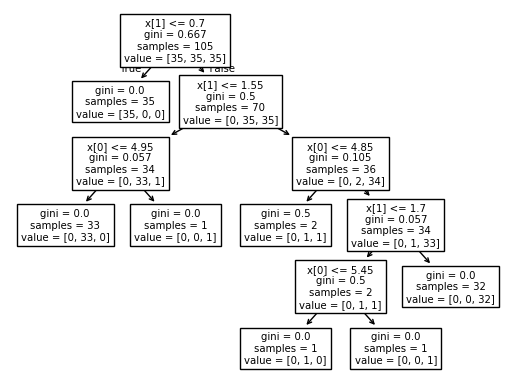

In [27]:
from sklearn import tree

tree.plot_tree(tree_model)

[Text(0.4, 0.8333333333333334, 'x[0] <= 2.45\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 1.55\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.105\nsamples = 36\nvalue = [0, 2, 34]')]

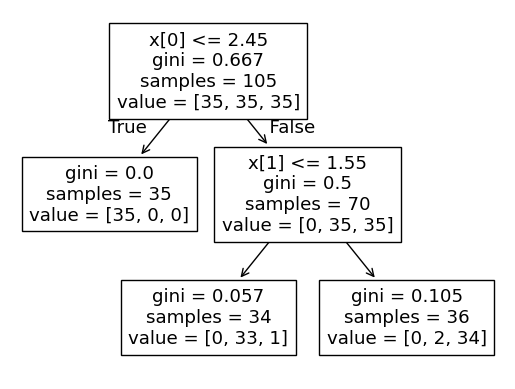

In [28]:
# 나뉘어진 클래스의 비율을 볼 때 가장 절반에서 시작해서 더이상 섞여있는 클래스가 없으면 거기서 가지치기를 멈춘다
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train, y_train)
tree_model.score(X_test, y_test)
tree.plot_tree(tree_model)

None


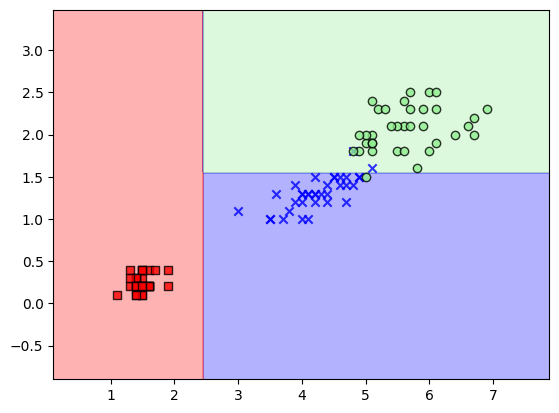

In [29]:
print(plot_decision_regions(X_train, y_train, tree_model))

[Text(0.3333333333333333, 0.9166666666666666, 'x[1] <= 0.7\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.2222222222222222, 0.75, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.2777777777777778, 0.8333333333333333, 'True  '),
 Text(0.4444444444444444, 0.75, 'x[1] <= 1.55\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.38888888888888884, 0.8333333333333333, '  False'),
 Text(0.2222222222222222, 0.5833333333333334, 'x[0] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.1111111111111111, 0.4166666666666667, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.5833333333333334, 'x[0] <= 4.85\ngini = 0.105\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(0.5555555555555556, 0.4166666666666667, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.7777777777777778, 0.4166666666666667, 'x[1] <= 1.7\ngini = 0.057\nsamples = 34\nval

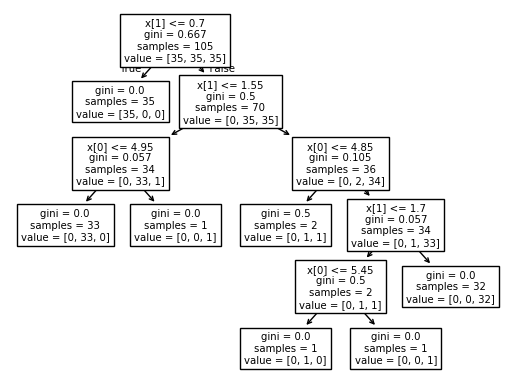

In [30]:
# 나뉘어진 클래스의 비율을 볼 때 가장 절반에서 시작해서 더이상 섞여있는 클래스가 없으면 거기서 가지치기를 멈춘다
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_model.score(X_test, y_test)
tree.plot_tree(tree_model)

None


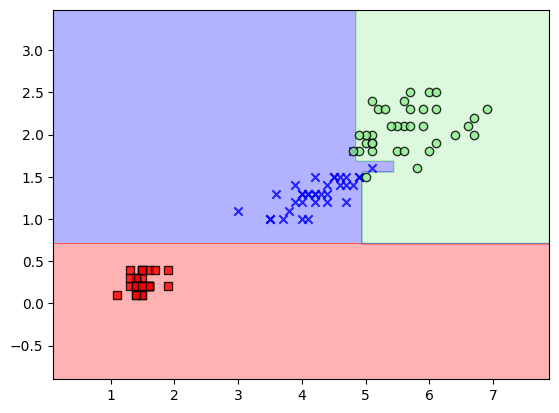

In [31]:
print(plot_decision_regions(X_train, y_train, tree_model))

# Random Forest로 여러 개의 결정 트리 연결하기

In [33]:
# 여러개의 트리가 만든 의사결정나무의 평균값을 가지고 클래스를 분류하는 분류모델
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier() # 100개의 Tree 분류로 똑같은 모델을 넘겨주고 결과를 받음
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test) # 여러 나무들의 의사결정

0.9333333333333333

In [34]:
print(tree_model.feature_importances_)
print(tree_model.predict(X_test)[:5]) #
print(tree_model.predict_proba(X_test)[:5])

print('-------------------------------------')
print(rf_model.feature_importances_)
print(rf_model.estimator_)
print(rf_model.estimators_)
print(rf_model.predict(X_test)[:5])
print(rf_model.predict_proba(X_test)[:5])

[0.0547504 0.9452496]
[2 1 2 1 2]
[[0.  0.  1. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  0.5 0.5]
 [0.  0.  1. ]]
-------------------------------------
[0.50206458 0.49793542]
DecisionTreeClassifier()
[DecisionTreeClassifier(max_features='sqrt', random_state=1441010018), DecisionTreeClassifier(max_features='sqrt', random_state=1543258239), DecisionTreeClassifier(max_features='sqrt', random_state=276443123), DecisionTreeClassifier(max_features='sqrt', random_state=1419055342), DecisionTreeClassifier(max_features='sqrt', random_state=526513921), DecisionTreeClassifier(max_features='sqrt', random_state=640612384), DecisionTreeClassifier(max_features='sqrt', random_state=1967528606), DecisionTreeClassifier(max_features='sqrt', random_state=746029029), DecisionTreeClassifier(max_features='sqrt', random_state=1343703047), DecisionTreeClassifier(max_features='sqrt', random_state=337153136), DecisionTreeClassifier(max_features='sqrt', random_state=1066273842), DecisionTreeClassifier(max_features='

# K-최근접 이웃: 게으른 학습 알고리즘

In [ ]:
# 인스턴스 기반 vs 모델 기반
# 모델 기반 알고리즘들(w)들에 지금까지 거친 훈련데이터들의 특징을 문신처럼 남겨놓습니다.
# w, b 값만 변하기 때문에 훈련을 많이 시킨다고 모델의 크기가 변하지 않습니다.

# 인스턴스 기반 알고리즘 지금까지 거친 훈련데이터를 기억합니다.
# 훈련을 많이 시킬수록 모델이 커집니다.
# 훈련할 때의 모든 데이터를 모델에 올려놓고, 새로 데이터가 들어오면 기존에 올려놓은 데이터들과의 '최단거리'를 계산합니다.


# K Nearest Neighbors (k-최근접 이웃 분류 알고리즘)

- 가장 고전적이고 직관적인 머신러닝 분류 알고리즘
- 기하학적 거리 분류기
- 가장 **가깝게 위치하는 멤버로 분류**하는 방식
- hyperparameter인 **K**값은 근처에 참고(reference)할 이웃의 숫자

![](https://miro.medium.com/max/405/0*QyWp7J6eSz0tayc0.png)

https://miro.medium.com/max/405/0*QyWp7J6eSz0tayc0.png

# 더미 데이터로 보는 KNN의 원리

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification # 더미데이터를 만드는 함수

<ipython-input-37-82f6ae254291>:18: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[i//3, i%3].scatter(red[:,0], red[:, 1], 80, 'r', '^')
<ipython-input-37-82f6ae254291>:19: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[i//3, i%3].scatter(blue[:,0], blue[:, 1], 80, 'b', '^')
<ipython-input-37-82f6ae254291>:20: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[i//3, i%3].scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')
<ipython-input-37-82f6ae254291>:18: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keywor

3
3
3
6
6
6
9
9
9


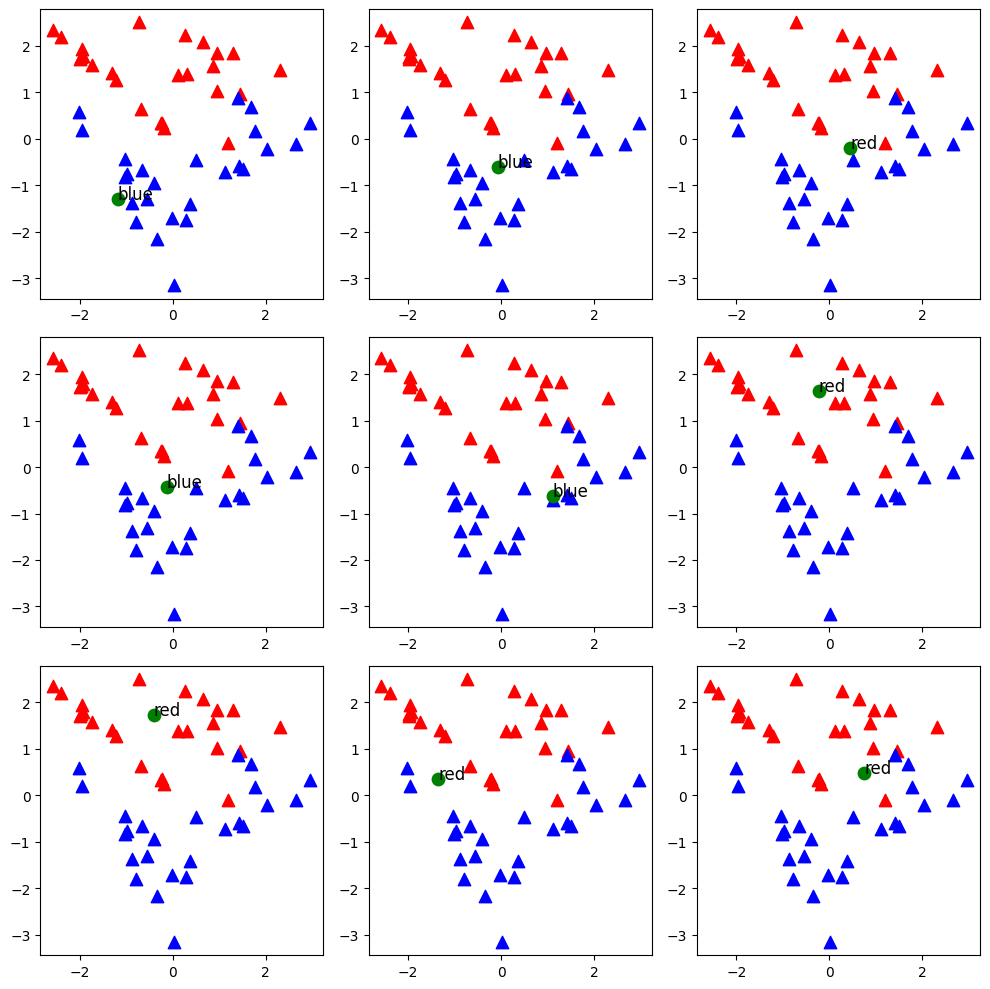

In [37]:
fig, axes = plt.subplots(3, 3) # 9 개를 만들거야 k의 개수를 바꿔가면서
fig.set_size_inches(10, 10)

for i in range(9):
    # 더미 데이터 생성  n_informative: 실제로 y값과 연관 있는 속성 / n_redundant 특성끼리 상관관계를 심어주는 속성
    X, y = make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0, random_state=30)

    blue = X[y==0]
    red = X[y==1]

    # 랜덤한 새로운 점 생성
    newcomer = np.random.randn(1, 2)

    # K
    K = 5*(i//3+1)


    axes[i//3, i%3].scatter(red[:,0], red[:, 1], 80, 'r', '^')
    axes[i//3, i%3].scatter(blue[:,0], blue[:, 1], 80, 'b', '^')
    axes[i//3, i%3].scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')

    # n_neighbors=3
    knn = KNeighborsClassifier(n_neighbors=K)
    print(3*(i//3+1))
    knn.fit(X, y)
    pred = knn.predict(newcomer)

    # 표기
    axes[i//3, i%3].annotate('red' if pred==1 else 'blue', xy=newcomer[0], xytext=(newcomer[0]), fontsize=12)

plt.tight_layout()
plt.show()

- k(근처에 비교할 점의 개수는) 홀수여야 하죠 -> 다수결로 했을 때 동점이 없기 때문에
- k가 동점일 때는 - 더 가까운 이웃 기반으로 newcomer의 결과를 선정 / 거리마저 같아버린다면 훈련데이터셋에 먼저 기록되어있던 샘플 클래스의 레이블을 취합니다.

- 훈련 데이터셋을 메모리에 모두 저장하기 때문에 학습에 걸리는 시간이 없음
- 데이터의 개수가 늘어날 수록 훈련 데이터셋에 할당하는 메모리가 커집니다.

- 머신러닝 모델은 크게 모델 기반/인스턴스 기반 모델로 나뉩니다
   - 인스턴스 기반 모델은 비모수모델 중 비모수모델 이라고 얘기합니다. 모델 기반은 모수모델이라고도 얘기합니다.

# '모': 어떠한 것에서 갈려 나오거나 생겨난 것의 근본이 됨
모수모델 - 고정된파라미터(w, b)를 모델이 학습함에 따라 정교화함 - 퍼셉트론, 로지스틱회귀, SVM(선형)

비모수모델 - 고정된 개수의 파라미터가 아니라 훈련 데이터가 늘어남에 따라 파라미터의 개수가 늘어남 - SVM(커널형-커널을 계산하는 함수의 차원이 늘어남), KNN(데이터가 늘어남), 결정트리/랜덤포레스트(노드가 늘어남)

In [43]:
# X_train, X_test, Y_train, y_test KNN모델로 분류해보세요. - 스케일링을 해서 결과가 달라집니다.
# 최적의 K는 무엇인지 score를 비교해서 확인해보세요.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 주변에 있는 k개의 점을 선택할 때 가장 가까운 거리 계산 -> 특성을 표준화해주면 각 필드 사이의 거리를 동일한 기준으로 계산하기 때문에 성능이 좋아집니다.

# I. 데이터 수집
iris = load_iris()
X = iris.data # 독립변수
y = iris.target # 종속변수

# II. 전처리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)

std = StandardScaler()
# fit - 훈련데이터의 평균, 분산을 구해서 기존의 데이터의 규격을 변환하는 과정.
std.fit(X_train) # mean_, var_, scale_

# transform 한 결과를 X_train_std, X_test_std에 저장합니다.
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)

# III. 모델 학습, 평가
for k in range(3, 12, 2):
    # III. 모델 훈련
    # 1. 인스턴스를 만든다
    knc = KNeighborsClassifier(n_neighbors=k)

    # 2. 훈련을 시킨다
    knc.fit(X_train_std, y_train)

    # IV. 모델 평가
    # 3. score를 평가한다.
    print(f'{k}일 때 모델의 정확도: {knc.score(X_test_std, y_test)}')

    # 스케일링 전 - 5, 11:  0.9555555555555556
    # 스케일링 후 - 7 : 9.7777777777


3일 때 모델의 정확도: 0.9111111111111111
5일 때 모델의 정확도: 0.9555555555555556
7일 때 모델의 정확도: 0.9777777777777777
9일 때 모델의 정확도: 0.9555555555555556
11일 때 모델의 정확도: 0.9555555555555556


# 과대적합(Overfitting)과 과소적합(Underfitting)

---
# 과대적합(Overfitting)과 과소적합(Underfitting)
![](https://gratus907.github.io/images/81b7294441f2b9c96cce938661b95a1d20d22366e5c0f72e48d2c69c9c7ad7b4.png)

- 과대적합
    - 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것을 말한다.

- 과소적합
    - 모델이 너무 단순하여 학습 데이터를
충분히 학습하지 못함
    - 데이터가 불충분하여 학습이 부족함

- 교차검증을 통해 과대적합, 과소적합을 방지할 수 있다!

## Model Selection 모듈이 필요한 이유
- model_selection - 학습 데이터와 테스트 데이터 세트를 분리 또는 교차 검증분할 및 평가, 하이퍼 파라미터 튜닝을 위한 다양한 함수 제공

In [44]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터를 나눠주기 위한 함수

In [45]:
# 최적의 K는 무엇인지 score를 비교해서 확인해보세요.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 주변에 있는 k개의 점을 선택할 때 가장 가까운 거리 계산 -> 특성을 표준화해주면 각 필드 사이의 거리를 동일한 기준으로 계산하기 때문에 성능이 좋아집니다.

# I. 데이터 수집
iris = load_iris()
X = iris.data # 독립변수
y = iris.target # 종속변수

# II. 전처리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121, shuffle=False)


In [46]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.8333333333333334

**2차 개선 : 교차 검증**
# K-Fold 교차 검증
- 데이터가 적은 경우 별도로 테스트데이터를 확보하면 비효율적
- 가능하면 많은 데이터를 학습에 사용하면서, 성능 평가하는 방법 필요
- K-겹교차검증(k-fold cross-validation)
    - 전체데이터를 k등분하고, 각 등분을 한번씩 테스트데이터로 사용하여, 성능평가를 하고 평균값을 선택하는 방법

![](https://i0.wp.com/drzinph.com/wp-content/uploads/2020/12/image-2.png?fit=935%2C670&ssl=1)
https://i0.wp.com/drzinph.com/wp-content/uploads/2020/12/image-2.png?fit=935%2C670&ssl=1

In [47]:
# 30개씩 5번 겹치지 않게 테스트데이터를 사용해봄을 통해 - 일반화 능력을 평가
# 데이터를 여러번 바꿔가면서 훈련해보기 때문에 모델이 데이터에 의존한 편향을 가지는 건 아닌지 검증

## 1. 일반화된 성능 평가 - 데이터를 여러번 겹치지 않게 바꾸어서 테스트해봄으로써 일반화 능력을 평가할 수 있게 됩니다.
# 2. 데이터를 여러번 나눠서 바꿔서 검증한 평균값을 모델의 성능으로 여기기 때문에 데이터 분할에 따른 편향을 방지
# 3. 모든 데이터를 학습에 사용, 모든 데이터를 테스트에 사용하게 함으로써 적은 데이터를 효과적으로 쓸 수 있다.

from sklearn.model_selection import KFold
import numpy as np

features = X
label = y

# 5개의 폴드 세트로 분할
kfold = KFold(n_splits=5, shuffle=True)
dt_clf = DecisionTreeClassifier(random_state=121)

n_iter = 0

# 평가한 결과치를 적재하기 위해
cv_accuracy = []

# 폴드별 학습용, 검증용 row index를 array 반환
for train_index, test_index in kfold.split(features):
    print(train_index, test_index)
    # 학습용, 검증용 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    n_iter += 1

    # 반복시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    cv_accuracy.append(accuracy)

print(np.mean(cv_accuracy))

[  0   2   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  25  27  28  29  30  31  32  34  35  36  37  38  42  43
  44  46  50  51  52  53  54  55  56  57  58  59  61  62  63  64  65  66
  67  68  69  70  73  74  75  76  77  79  80  81  82  83  84  85  86  88
  89  91  92  94  95  96  97  98  99 100 101 104 105 106 107 108 109 110
 111 113 114 116 117 118 119 120 121 122 123 125 126 128 129 130 132 134
 136 137 138 139 140 141 142 144 145 146 147 148] [  1   3  24  26  33  39  40  41  45  47  48  49  60  71  72  78  87  90
  93 102 103 112 115 124 127 131 133 135 143 149]
[  1   2   3   4   5   6   7   8   9  10  11  12  14  15  17  18  19  20
  21  22  23  24  26  28  29  30  31  32  33  34  36  37  39  40  41  42
  43  44  45  47  48  49  50  51  52  53  54  55  58  59  60  61  63  64
  65  66  67  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86
  87  88  89  90  92  93  95  96  97  98  99 100 101 102 103 104 105 108
 111 112 113 115 116 117

In [48]:
cv_accuracy

[0.9667, 0.9, 1.0, 0.9333, 1.0]

<hr>

**Stratified K 폴드** (층화 추출)

- 불균형한(imbalanced) 분포도를 가진 레이블(결정 class) 데이터 집합을 위한 K 폴드 방식
- 불균형한 분포도란? 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것 의미
- K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제 해결
- 원리 : 원본 데이터의 레이블(target) 분포를 먼저 고려 -> 이 분포와 동일하게 학습과 검증 데이터 세트를 분배
![](https://miro.medium.com/max/474/1*sN7NniZxnC9xTuW8iqRJzA.jpeg)
https://miro.medium.com/max/474/1*sN7NniZxnC9xTuW8iqRJzA.jpeg
![](https://i0.wp.com/dataaspirant.com/wp-content/uploads/2020/12/8-Stratified-K-Fold-Cross-Validation.png?ssl=1)
https://i0.wp.com/dataaspirant.com/wp-content/uploads/2020/12/8-Stratified-K-Fold-Cross-Validation.png?ssl=1

```
예를 들어 대출사기 데이터가 1억건 있고,
수십개의 피처와 대출 사기 여부를 뜻하는
레이블(대출 사기:1, 정상 대출 : 0)이 있다고 가정합니다.

데이터의 대부분은 정상 대출이고,
대출 사기가 약 1000건 있다고 한다면
전체의 0.0001%의 아주 작은 확률로 대출 사기 레이블이 존재합니다.

이렇게 작은 비율로 1 레이블 값이 있다면 KFold로
랜덤하게 학습 및 테스트 세트의 인덱스를 고른다면
레이블 값인 0과 1의 비율을 제대로 반영하지 못하는 경우가 쉽게 발생합니다.
```

In [49]:
from sklearn.model_selection import StratifiedKFold
train_test_split(X,y, stratify=y)

[array([[4.3, 3. , 1.1, 0.1],
        [6.2, 2.2, 4.5, 1.5],
        [6.3, 2.5, 4.9, 1.5],
        [5.1, 3.7, 1.5, 0.4],
        [5.9, 3. , 5.1, 1.8],
        [5.5, 2.5, 4. , 1.3],
        [6. , 2.7, 5.1, 1.6],
        [7.7, 2.8, 6.7, 2. ],
        [4.9, 3.6, 1.4, 0.1],
        [5.5, 4.2, 1.4, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [6.4, 2.8, 5.6, 2.2],
        [6.4, 3.2, 4.5, 1.5],
        [5. , 3.5, 1.3, 0.3],
        [7.1, 3. , 5.9, 2.1],
        [5.4, 3.9, 1.7, 0.4],
        [5.7, 2.8, 4.5, 1.3],
        [6.3, 2.7, 4.9, 1.8],
        [5.4, 3. , 4.5, 1.5],
        [7.7, 3.8, 6.7, 2.2],
        [5.6, 2.9, 3.6, 1.3],
        [5.5, 2.3, 4. , 1.3],
        [5. , 3. , 1.6, 0.2],
        [5.7, 2.9, 4.2, 1.3],
        [6.3, 2.8, 5.1, 1.5],
        [6.1, 2.8, 4. , 1.3],
        [5.1, 3.5, 1.4, 0.3],
        [5.9, 3.2, 4.8, 1.8],
        [7.9, 3.8, 6.4, 2. ],
        [6.2, 2.8, 4.8, 1.8],
        [6.3, 2.9, 5.6, 1.8],
        [6.1, 3. , 4.6, 1.4],
        [5.8, 2.8, 5.1, 2.4],
        [6

In [50]:
# 30개씩 5번 겹치지 않게 테스트데이터를 사용해봄을 통해 - 일반화 능력을 평가
# 데이터를 여러번 바꿔가면서 훈련해보기 때문에 모델이 데이터에 의존한 편향을 가지는 건 아닌지 검증

## 1. 일반화된 성능 평가 - 데이터를 여러번 겹치지 않게 바꾸어서 테스트해봄으로써 일반화 능력을 평가할 수 있게 됩니다.
# 2. 데이터를 여러번 나눠서 바꿔서 검증한 평균값을 모델의 성능으로 여기기 때문에 데이터 분할에 따른 편향을 방지
# 3. 모든 데이터를 학습에 사용, 모든 데이터를 테스트에 사용하게 함으로써 적은 데이터를 효과적으로 쓸 수 있다.

from sklearn.model_selection import StratifiedKFold
import numpy as np

features = X
label = y

# 5개의 폴드 세트로 분할
kfold = StratifiedKFold(n_splits=5, shuffle=True)
dt_clf = DecisionTreeClassifier(random_state=121)

n_iter = 0

# 평가한 결과치를 적재하기 위해
cv_accuracy = []

# 폴드별 학습용, 검증용 row index를 array 반환
for train_index, test_index in kfold.split(features, y=label):
    print(train_index, test_index)
    # 학습용, 검증용 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    n_iter += 1

    # 반복시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    cv_accuracy.append(accuracy)

print(np.mean(cv_accuracy))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  20  21  22  23  24  25  27  30  33  34  35  36  37  38  39  40  42
  45  47  48  49  50  51  52  55  56  58  59  60  61  63  64  65  66  68
  69  70  71  72  73  74  75  77  78  80  81  82  83  85  86  87  88  89
  90  91  93  94  96  97  98  99 100 101 102 103 104 105 108 109 110 111
 112 113 114 115 116 117 119 120 122 126 127 128 129 131 132 133 134 135
 137 138 139 140 142 143 144 145 146 147 148 149] [ 19  26  28  29  31  32  41  43  44  46  53  54  57  62  67  76  79  84
  92  95 106 107 118 121 123 124 125 130 136 141]
[  0   1   2   3   4   5   6   7   8  10  11  13  14  15  16  18  19  20
  21  22  23  26  27  28  29  30  31  32  33  34  35  36  37  38  41  42
  43  44  45  46  50  52  53  54  55  57  58  59  61  62  63  64  65  66
  67  68  70  71  72  73  75  76  77  78  79  80  81  83  84  86  87  89
  91  92  93  94  95  96  97  98 100 101 102 103 104 106 107 109 111 112
 113 114 116 117 118 119

**교차 검증을 더 간결하게 작업하기 : cross_val_score()**

1. 교차 검증을 쉽게 해주는 API
2. 폴드셋 설정 -> for 에서 반복 학습 및 테스트 데이터의 index 추출 -> 반복적으로 학습과 예측 수행 및 성능 평가 : 한번에 처리

In [51]:
from sklearn.model_selection import cross_val_score

dt_clf2 = DecisionTreeClassifier(random_state=121, max_depth=3)

test_result = cross_val_score(dt_clf2, X=iris.data, y=iris.target, cv=5, scoring='accuracy', verbose=True) # 성능 평가만을 위한 API
test_result.mean()

0.9733333333333334

In [52]:
test_result.mean()

0.9733333333333334


**교차 검증과 최적 하이퍼 파라미터 튜닝을 한번에 하기**

1. GridSearchCV - 교차 검증
    * 다양한 모델의 훈련 과정을 자동화하고, 교차 검사를 사용해 최적 값을 제공하는 도구
2. 하이퍼파라미터를 순차적으로 적용하면서 편리하게 최적의 파라미터 도출
3. 격자형식으로 dict 구조의 하이퍼파라미터값 적용

In [53]:
'''
1과 2
1과 3

2와 2
2와 3

3과 2
3과 3
'''
# 1. 클래스 임포트
from sklearn.model_selection import GridSearchCV
# DecisitionTree -> 가지치기를 몇번 할 것인가 max_depth, 몇개 이하의 샘플로 나뉘면 더이상 가지를 치지 않을 것인가 : min_samples_split

dt_clf = DecisionTreeClassifier() # 알고리즘만 선택
# 일일히 파라미터를 수정해나간다면...
params = {'max_depth': range(1, 6), 'min_samples_split': [2, 3, 4, 5]}

# 2. 클래스를 통한 인스턴스 생성
grid_clf = GridSearchCV(dt_clf, cv=5, scoring='accuracy', param_grid=params)

# 3. 인스턴스에 해야할 일을 파라미터 또는 fit 이라는 함수로 맡김 - 훈련데이터 사용
grid_clf.fit(iris.data, iris.target)

# 4. 훈련된 인스턴스에 새로운 데이터(test)를 주면서 평가

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 6),
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy')

In [54]:
print(grid_clf.best_score_)
print(grid_clf.best_params_)
print(grid_clf.best_estimator_)
print(grid_clf.n_splits_)
print(grid_clf.scorer_)

0.9733333333333334
{'max_depth': 3, 'min_samples_split': 4}
DecisionTreeClassifier(max_depth=3, min_samples_split=4)
5
make_scorer(accuracy_score, response_method='predict')
